<a href="https://colab.research.google.com/github/smarulandas/samuel-Marualanda/blob/main/Simulacion_Masa_Resorte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación

In [ ]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control
!pip install control


In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np


sym.init_printing()

s = sym.symbols('s', complex=True)
t, m, c, k = sym.symbols('t m c k', positive=True, real=True)

# Entrada de interés en Laplace
X = 1  # X(s) = 1 Respuesta a impulso; X(s) = 1/s respuesta a escalón, X(s) = 1/s**2 respuesta a la rampa

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m * s**2 + c * s + k)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

In [ ]:
# Evaluar valores específicos para m, c y k
param_values = {m: 4, c: sym.Rational('0.9'), k: sym.Rational('0.8')}
H_evaluated = H.subs(param_values)

H, p1, p2, H_evaluated

⎛                                   ____________                     ____________                ⎞
⎜                                  ╱      2                         ╱      2                     ⎟
⎜                                 ╱    C⋅R                         ╱    C⋅R                      ⎟
⎜                        1.0⋅ⅈ⋅  ╱   - ──── + 1           1.0⋅ⅈ⋅  ╱   - ──── + 1                 ⎟
⎜      1            R          ╲╱      4⋅L           R          ╲╱      4⋅L              1       ⎟
⎜──────────────, - ─── + ───────────────────────, - ─── - ───────────────────────, ──────────────⎟
⎜             2    2⋅L            √C⋅√L             2⋅L            √C⋅√L              2   9⋅s   4⎟
⎜c⋅s + k + m⋅s                                                                     4⋅s  + ─── + ─⎟
⎝                                                                                         10    5⎠

In [ ]:
# Imprimir valores evaluados
print('p1 =', p1.subs(param_values))
print('p2 =', p2.subs(param_values))
print('xi =', xi.subs(param_values))
print('omega_n =', wn.subs(param_values))

H, p1, p2, H_evaluated

p1 = -R/(2*L) + 1.0*I*sqrt(-C*R**2/(4*L) + 1)/(sqrt(C)*sqrt(L))
p2 = -R/(2*L) - 1.0*I*sqrt(-C*R**2/(4*L) + 1)/(sqrt(C)*sqrt(L))
xi = sqrt(C)*R/(2*sqrt(L))
omega_n = 1/(sqrt(C)*sqrt(L))


⎛                                   ____________                     ____________                ⎞
⎜                                  ╱      2                         ╱      2                     ⎟
⎜                                 ╱    C⋅R                         ╱    C⋅R                      ⎟
⎜                        1.0⋅ⅈ⋅  ╱   - ──── + 1           1.0⋅ⅈ⋅  ╱   - ──── + 1                 ⎟
⎜      1            R          ╲╱      4⋅L           R          ╲╱      4⋅L              1       ⎟
⎜──────────────, - ─── + ───────────────────────, - ─── - ───────────────────────, ──────────────⎟
⎜             2    2⋅L            √C⋅√L             2⋅L            √C⋅√L              2   9⋅s   4⎟
⎜c⋅s + k + m⋅s                                                                     4⋅s  + ─── + ─⎟
⎝                                                                                         10    5⎠

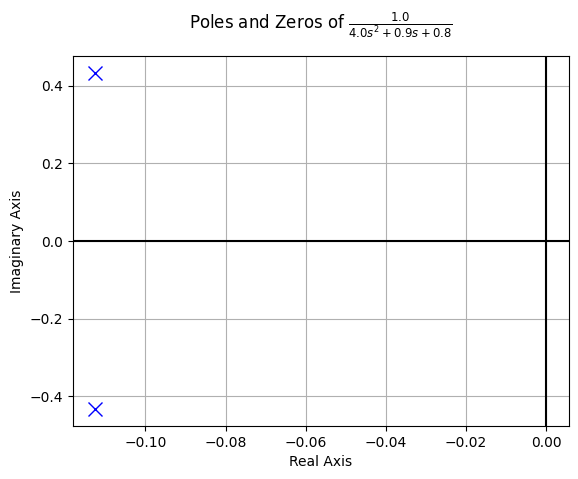

In [ ]:
from sympy import symbols, fraction, cancel
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

# Definir la variable de Laplace
s = symbols('s', complex=True)
m, c, k = symbols('m c k', positive=True, real=True)

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m * s**2 + c * s + k)

# Evaluar valores específicos para m, c y k
param_values = {m: 4, c: 0.9, k: 0.8}
H_evaluated = H.subs(param_values)

# Obtener numerador y denominador
num, den = fraction(cancel(H_evaluated))

# Crear función de transferencia y graficar polos y ceros
tf1 = TransferFunction(num, den, s)
pole_zero_plot(tf1)


In [ ]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

      1       
──────────────
             2
c⋅s + k + m⋅s 

In [ ]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp


      1       
──────────────
             2
c⋅s + k + m⋅s 

In [ ]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

0

In [ ]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(param_values).apart(s)
Ye

         0.25         
──────────────────────
     2                
1.0⋅s  + 0.225⋅s + 0.2

In [ ]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

                  -0.1125⋅t                        
2.31036392903163⋅ℯ         ⋅sin(0.43283224232952⋅t)

In [ ]:
limite_grafica = float((3 / xi * wn).subs(param_values).evalf())
sym.plot(yt, (t, 0, limite_grafica), xlabel='$t$', ylabel='$y(t)$')
plt.show()

TypeError: Cannot convert expression to float

La curva muestra un comportamiento inicialmente ascendente desde cero, alcanzando un máximo para luego descender. Esta respuesta es característica de sistemas de segundo orden con amortiguamiento subamortiguado o críticamente amortiguado.
En un sistema subamortiguado, observaríamos oscilaciones amortiguadas alrededor del valor de equilibrio, mientras que en un sistema críticamente amortiguado veríamos un retorno suave al equilibrio sin sobrepasos adicionales.
Esta dinámica, si representa el desplazamiento y(t) de un sistema masa-resorte-amortiguador, indica que:

El sistema parte del reposo (y=0)
Responde a una excitación externa (posiblemente una entrada escalón o impulso)
Alcanza un desplazamiento máximo donde momentáneamente la velocidad se hace cero
Posteriormente regresa hacia su posición de equilibrio bajo la influencia de las fuerzas restauradoras del resorte y la disipación de energía del amortiguador

El tiempo que tarda en alcanzar el valor máximo y la magnitud de este pico proporcionan información importante sobre la rigidez del sistema y su factor de amortiguamiento.

Para sistema equivalente masa rwsorte amortiguador a partir del circuito electrico

In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import control as ctl  # Librería alternativa para sistemas de control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, L, R, C = sym.symbols('t L R C', positive=True, real=True)

# Entrada de interés en Laplace
X = 1  # X(s) = 1 Respuesta a impulso; X(s) = 1/s respuesta a escalón, X(s) = 1/s**2 respuesta a la rampa

# Función de transferencia del sistema eléctrico
H = 1 / (L * s**2 + R * s + (1 / C))

# Función de salida según entrada de interés
Y = H * X  # Función de transferencia multiplicada por la entrada X(s)

# Cálculo de los polos
xi = R / (2 * sym.sqrt(L / C))  # Factor de amortiguamiento
wn = sym.sqrt(1 / (L * C))  # Frecuencia natural
p1 = -xi * wn + 1j * wn * sym.sqrt(1 - xi**2)
p2 = -xi * wn - 1j * wn * sym.sqrt(1 - xi**2)

# Evaluar valores específicos para L, R y C
param_values = {L: 1, R: sym.Rational('0.5'), C: sym.Rational('0.4')}
H_evaluated = H.subs(param_values)
Y_evaluated = Y.subs(param_values)

# Imprimir valores evaluados
print('p1 =', p1.subs(param_values))
print('p2 =', p2.subs(param_values))
print('xi =', xi.subs(param_values))
print('omega_n =', wn.subs(param_values))
print('Y(s) =', Y_evaluated)

# Extraer numerador y denominador
num, den = sym.fraction(sym.cancel(H_evaluated))
num = [float(num)] if num.is_Number else [float(c) for c in sym.Poly(num, s).all_coeffs()]
den = [float(c) for c in sym.Poly(den, s).all_coeffs()]

# Crear y graficar la función de transferencia
tf1 = ctl.TransferFunction(num, den)
plt.figure()
ctl.pzmap(tf1, plot=True)
plt.title("Diagrama de Polos y Ceros")
plt.grid()
plt.show()

# Gráfica de la respuesta en el tiempo
t_values = np.linspace(0, 10, 1000)
t_out, y_out = ctl.impulse_response(tf1, t_values)
plt.figure()
plt.plot(t_out, y_out, label="Respuesta al impulso")
plt.xlabel("Tiempo (s)")
plt.ylabel("y(t)")
plt.title("Respuesta en el Tiempo")
plt.legend()
plt.grid()
plt.show()

H, Y, p1, p2, H_evaluated, Y_evaluated


La señal exhibe un comportamiento oscilatorio con amplitud decreciente antes de converger a cero, lo que caracteriza claramente a un sistema subamortiguado. Esta respuesta transitoria muestra cómo el sistema oscila alrededor de su posición de equilibrio mientras la energía se disipa gradualmente a través del mecanismo de amortiguamiento.
El patrón de oscilaciones amortiguadas confirma que el factor de amortiguamiento (ξ) es menor que 1 pero mayor que 0, permitiendo que el sistema oscile mientras eventualmente alcanza la estabilidad. Cada oscilación sucesiva tiene una amplitud menor que la anterior, con una envolvente exponencial decreciente que delimita los picos de las oscilaciones.
La convergencia final a cero indica que el sistema es estable y regresa a su estado de equilibrio después de la perturbación inicial, sin ninguna desviación permanente (offset) o respuesta en estado estacionario no nula.